## NBA Draft 2018 Prediction--<span style='color:blue'> </span>

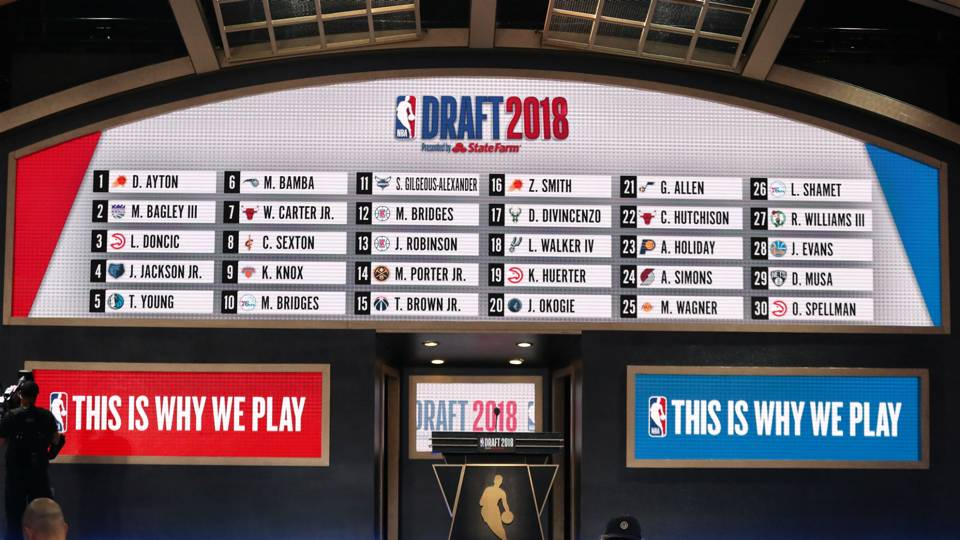

In [3]:
from IPython.display import Image   
#to display the image using code cell, should put the image and the Ipython notebook in the same folder
Image(filename='NBA-Draft.jpg')

### <span style = 'color:red'> know the topic!<span>

#### Performance data:
FGM, FGA, FG%: field goals made, attempted and percentage
3PM, 3PA, 3P%: 3 points made, attempted and percentage
FTM, FTA, FT%: free throws made, attempted and percentage
TOV, PF: turnovers, personal fouls
ORB, DRB, ORB%, DRB%: offensive, defensive rebounds and percentage
RPG, APG, SPG, BPG, PPG: statistic per game, rebounds, assists, steals, blocks, points
TS: true shooting percentage
eFG%: effective field goal percentage
AST%, TOV%, STL%, BLK%, USG%: percentages of, assist, turnover, steal, block, usage(of team play)
ORtg, DRtg: offensive, defensive rating
eDiff: the difference between a team or player's ORtg and DRtg
PPS, PPR: points per Shot and pure point rating

#### Profile data:
Pos, Weight, Age, Agility, Shuttle Run, Sprint, Standing Vertical,
Max Vertical Leap, Max Bench Press, Body Fat Percentage,
Hand Length, Hand Width, Heightw/oshoesinches,
Heightw/shoesinches, Standing_Reach_inches, Wingspan_inches

#### Target:
WS (Win Shares): an estimate of the total number of wins a player produces.

### <span style = 'color:red'>package import

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.model_selection import train_test_split ## training-validation-test data split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate ## for cross validation

### <span style = 'color:red'>data loading

In [67]:
data = pd.read_csv('all_college_data.csv', na_values = '-')

In [6]:
data.head()

,Player,Team_x,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,Standing Vertical,Max Vertical Leap,Max Bench Press,Body Fat Percentage,Hand Length,Hand Width,Heightw/oshoesinches,Heightw/shoesinches,Standing_Reach_inches,Wingspan_inches
0,Andre Roberson,CU,36,30.2,4.1,8.1,0.510,0.5,1.4,0.380,...,30.0,36.5,10.0,0.0705,8.75,9.50,78.25,79.00,104.5,83.0
1,Lavoy Allen,TEM,33,33.9,4.7,9.7,0.480,0.2,0.5,0.294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vernon Macklin,UF,37,24.5,5.2,8.7,0.593,0.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ryan Kelly,DUKE,31,25.9,3.5,7.8,0.444,1.3,3.2,0.408,...,NaN,NaN,NaN,0.1475,9.00,10.00,81.75,83.75,110.0,83.5
4,Michael Kidd-Gilchrist,UK,40,31.1,4.0,8.2,0.491,0.3,1.3,0.255,...,32.0,35.5,6.0,0.0700,9.00,10.25,77.75,79.50,104.5,84.0


### <span style="color:red">data description

In [7]:
data.shape

(417, 60)

In [8]:
data.describe()

,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,Standing Vertical,Max Vertical Leap,Max Bench Press,Body Fat Percentage,Hand Length,Hand Width,Heightw/oshoesinches,Heightw/shoesinches,Standing_Reach_inches,Wingspan_inches
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,...,325.000000,324.000000,318.000000,319.000000,157.000000,157.000000,348.000000,325.000000,348.000000,349.000000
mean,33.784173,31.935971,5.804892,11.845156,0.496564,1.150671,3.084748,0.315410,3.774724,5.101127,...,29.676923,34.833333,11.320755,0.071210,8.789809,9.528662,77.623563,78.946154,103.576868,82.503152
std,3.109607,3.577890,1.266687,2.861556,0.060827,0.962203,2.426055,0.161675,1.404653,1.716333,...,2.802158,3.381108,5.201093,0.024991,0.480809,0.705387,3.322566,3.339893,4.871994,4.067597
min,22.000000,19.100000,2.620000,4.290000,0.356000,0.000000,0.000000,0.000000,0.760000,1.420000,...,22.500000,25.000000,0.000000,0.026000,7.500000,7.250000,67.750000,69.000000,89.500000,70.000000
25%,32.000000,30.200000,4.900000,9.850000,0.451000,0.200000,0.600000,0.284000,2.800000,3.900000,...,28.000000,32.500000,8.000000,0.054000,8.500000,9.000000,75.250000,76.750000,100.000000,79.750000
50%,34.000000,32.300000,5.800000,11.800000,0.483000,1.100000,3.000000,0.350000,3.600000,4.900000,...,30.000000,35.000000,11.000000,0.067000,8.750000,9.500000,78.000000,79.250000,104.000000,82.750000
75%,36.000000,34.300000,6.600000,13.600000,0.534000,1.900000,5.000000,0.399000,4.700000,6.200000,...,31.500000,37.000000,15.000000,0.080000,9.000000,10.000000,80.250000,81.500000,107.000000,85.500000
max,41.000000,38.900000,9.800000,21.800000,0.660000,3.900000,9.900000,1.000000,8.700000,11.200000,...,39.500000,44.000000,26.000000,0.208000,10.250000,11.500000,85.250000,86.500000,114.500000,91.000000


### <span style="color:red">data cleaning

In [9]:
data.isnull().sum()

Player                     0
Team_x                     0
GP                         0
MPG                        0
FGM                        0
FGA                        0
FG%                        0
3PM                        0
3PA                        0
3P%                        0
FTM                        0
FTA                        0
FT%                        0
TOV                        0
PF                         0
ORB                        0
DRB                        0
RPG                        0
APG                        0
SPG                        0
BPG                        0
PPG                        0
TS%                        8
eFG%                       8
Total S %                  8
ORB%                       8
DRB%                       8
TRB%                       8
AST%                       8
TOV%                       8
STL%                       8
BLK%                       8
USG%                       8
PPR                        8
PPS           

In [10]:
data[data.PER.isnull()] ##show the row which has null value

,Player,Team_x,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,Standing Vertical,Max Vertical Leap,Max Bench Press,Body Fat Percentage,Hand Length,Hand Width,Heightw/oshoesinches,Heightw/shoesinches,Standing_Reach_inches,Wingspan_inches
29,Malcolm Lee,UCLA,33,33.1,4.3,9.8,0.437,1.2,4.0,0.295,...,30.0,35.5,17.0,0.0590,8.5,9.5,76.00,77.50,101.5,81.75
33,Amir Johnson,RU,28,35.8,4.4,11.8,0.373,1.5,4.4,0.344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Taurean Green,UF,39,33.4,3.3,9.1,0.366,2.3,5.9,0.384,...,29.0,32.5,8.0,0.0460,NaN,NaN,71.00,72.75,96.0,74.25
42,Jordan Farmar,UCLA,37,30.4,4.6,11.4,0.410,1.7,5.1,0.333,...,33.5,42.0,11.0,0.0440,NaN,NaN,72.75,74.00,94.5,75.00
70,Archie Goodwin,UK,33,31.8,4.8,10.8,0.440,0.5,1.9,0.266,...,30.0,36.0,1.0,0.0455,8.5,9.0,75.75,77.25,102.0,81.50
119,Daniel Ewing,DUKE,33,34.5,5.5,12.8,0.427,2.1,6.0,0.347,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,Mike Taylor,ISU,26,32.2,5.0,13.6,0.365,2.3,6.7,0.345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,Austin Rivers,DUKE,34,33.2,5.1,11.8,0.433,1.7,4.7,0.365,...,32.5,37.5,1.0,0.0620,8.5,10.0,75.50,77.00,96.5,79.25


In [11]:
data=data.dropna(thresh=len(data)*0.9,axis=1) 
## if the non-null values is <90%, drop the column, 0 or index, 1 or columns

In [12]:
data=data.dropna(subset=['PER'])
##drop 'PER' rows containing null values

In [13]:
data.head()

,Player,Team_x,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,eDiff,FIC,PER,WS,WS/48,Pick,Pos,Weight,Age,Pre-Draft Team
0,Andre Roberson,CU,36,30.2,4.1,8.1,0.510,0.5,1.4,0.380,...,28.4,513.0,24.6,4.2,0.085,26.0,SG,210.0,21.0,Colorado
1,Lavoy Allen,TEM,33,33.9,4.7,9.7,0.480,0.2,0.5,0.294,...,31.0,438.4,22.4,3.7,0.110,50.0,PF/C,260.0,22.0,Temple
2,Vernon Macklin,UF,37,24.5,5.2,8.7,0.593,0.0,0.0,0.000,...,19.1,288.5,20.6,0.5,0.161,52.0,F,227.0,24.0,Florida
3,Ryan Kelly,DUKE,31,25.9,3.5,7.8,0.444,1.3,3.2,0.408,...,26.3,283.5,22.1,2.2,0.081,48.0,PF,230.0,22.0,Duke
4,Michael Kidd-Gilchrist,UK,40,31.1,4.0,8.2,0.491,0.3,1.3,0.255,...,24.6,424.5,20.3,5.8,0.119,2.0,SF,232.0,18.0,Kentucky


In [14]:
data.shape  #409 row and 47 columns in total now

(409, 47)

In [15]:
##review the new data
data.isnull().sum()

Player            0
Team_x            0
GP                0
MPG               0
FGM               0
FGA               0
FG%               0
3PM               0
3PA               0
3P%               0
FTM               0
FTA               0
FT%               0
TOV               0
PF                0
ORB               0
DRB               0
RPG               0
APG               0
SPG               0
BPG               0
PPG               0
TS%               0
eFG%              0
Total S %         0
ORB%              0
DRB%              0
TRB%              0
AST%              0
TOV%              0
STL%              0
BLK%              0
USG%              0
PPR               0
PPS               0
ORtg              0
DRtg              0
eDiff             0
FIC               0
PER               0
WS                0
WS/48             1
Pick              2
Pos               2
Weight            2
Age               2
Pre-Draft Team    2
dtype: int64

In [16]:
data.Pos
#there're different class of 'Pos'

0         SG
1       PF/C
2          F
3         PF
4         SF
5      SF/PF
6         SG
7         SG
8      PF/SF
9       PF/C
10        PF
11        SF
12        FC
13        SG
14         C
15        SG
16        SG
17     SF/PF
18        SG
19        SF
20        SF
21       NaN
22         C
23        PG
24        SF
25        SG
26        PF
27         C
28         C
30        PF
       ...  
387       SG
388        C
389     C/PF
390       PG
391    SG/PG
392     C/PF
393       PG
394     C/PF
395    PF/SF
396     PF/C
397        C
398        C
399        C
400        F
401       FC
402        F
403        C
404       PG
405        C
406        C
407       PF
408       PF
409       FC
410        C
411       PG
412       PF
413       PF
414    SF/PF
415     C/PF
416        C
Name: Pos, Length: 409, dtype: object

In [17]:
data.Pos = data.Pos.fillna('nan') #fill nan in the null values in Pos
data.Weight = data.Weight.fillna(data.Weight.mean()) #fill the mean of weight in the null values in Weight
data.Age = data.Age.fillna(data.Age.mean())
data.Pick = data.Pick.fillna(61) ##for non selected player
data['WS/48'] = data['WS/48'].fillna(data['WS/48'].mean())#do not use WS/48 as a row name, may cause '/'
data['Pre-Draft Team'] = data['Pre-Draft Team'].fillna('others')#not use Pre-Draft Team as a row name, may cause '-'and sapce

In [18]:
data.isnull().sum() # check null again

Player            0
Team_x            0
GP                0
MPG               0
FGM               0
FGA               0
FG%               0
3PM               0
3PA               0
3P%               0
FTM               0
FTA               0
FT%               0
TOV               0
PF                0
ORB               0
DRB               0
RPG               0
APG               0
SPG               0
BPG               0
PPG               0
TS%               0
eFG%              0
Total S %         0
ORB%              0
DRB%              0
TRB%              0
AST%              0
TOV%              0
STL%              0
BLK%              0
USG%              0
PPR               0
PPS               0
ORtg              0
DRtg              0
eDiff             0
FIC               0
PER               0
WS                0
WS/48             0
Pick              0
Pos               0
Weight            0
Age               0
Pre-Draft Team    0
dtype: int64

In [19]:
data.shape

(409, 47)

### <span style="color:red">Feature creation/engineering

In [21]:
data.Pos.head()  ## there're two position for some person

0      SG
1    PF/C
2       F
3      PF
4      SF
Name: Pos, dtype: object

In [22]:
l = data.Pos.str.split("/").tolist() ##split using '/', then change the data type to list
l

[['SG'],
 ['PF', 'C'],
 ['F'],
 ['PF'],
 ['SF'],
 ['SF', 'PF'],
 ['SG'],
 ['SG'],
 ['PF', 'SF'],
 ['PF', 'C'],
 ['PF'],
 ['SF'],
 ['FC'],
 ['SG'],
 ['C'],
 ['SG'],
 ['SG'],
 ['SF', 'PF'],
 ['SG'],
 ['SF'],
 ['SF'],
 ['nan'],
 ['C'],
 ['PG'],
 ['SF'],
 ['SG'],
 ['PF'],
 ['C'],
 ['C'],
 ['PF'],
 ['F'],
 ['SF', 'PF'],
 ['F'],
 ['SF'],
 ['C'],
 ['C'],
 ['PF', 'SF'],
 ['SF', 'SG'],
 ['SF'],
 ['F'],
 ['C'],
 ['FC'],
 ['PF'],
 ['SG', 'PG'],
 ['C'],
 ['PF'],
 ['PF'],
 ['PF'],
 ['C', 'PF'],
 ['SG'],
 ['C'],
 ['PF'],
 ['SG'],
 ['PF', 'C'],
 ['PF'],
 ['FC'],
 ['SF', 'SG'],
 ['SG', 'SF'],
 ['nan'],
 ['C'],
 ['PG'],
 ['PF', 'C'],
 ['G'],
 ['SG', 'SF'],
 ['C', 'PF'],
 ['PF'],
 ['SG', 'PG'],
 ['C', 'PF'],
 ['PF'],
 ['PF'],
 ['PF'],
 ['PF'],
 ['SF', 'SG'],
 ['SF'],
 ['C'],
 ['C', 'PF'],
 ['PF', 'SF'],
 ['G'],
 ['PF', 'C'],
 ['PG'],
 ['PG'],
 ['SG'],
 ['PF', 'C'],
 ['SF'],
 ['PG', 'SG'],
 ['PF', 'SF'],
 ['PG'],
 ['C', 'PF'],
 ['SG'],
 ['SG'],
 ['PF'],
 ['PG'],
 ['PF', 'C'],
 ['G'],
 ['C'],
 ['C', 'PF']

In [23]:
flat_list = [item for sublist in l for item in sublist]
## convert list of list to a different list
np.unique(flat_list) # to check the #of different positions

array(['C', 'F', 'F-G', 'FC', 'G', 'G-F', 'GF', 'PF', 'PG', 'SF', 'SG',
       'nan'], dtype='<U3')

In [24]:
data = data.reset_index(drop=True)

In [25]:
data.head()

,Player,Team_x,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,eDiff,FIC,PER,WS,WS/48,Pick,Pos,Weight,Age,Pre-Draft Team
0,Andre Roberson,CU,36,30.2,4.1,8.1,0.510,0.5,1.4,0.380,...,28.4,513.0,24.6,4.2,0.085,26.0,SG,210.0,21.0,Colorado
1,Lavoy Allen,TEM,33,33.9,4.7,9.7,0.480,0.2,0.5,0.294,...,31.0,438.4,22.4,3.7,0.110,50.0,PF/C,260.0,22.0,Temple
2,Vernon Macklin,UF,37,24.5,5.2,8.7,0.593,0.0,0.0,0.000,...,19.1,288.5,20.6,0.5,0.161,52.0,F,227.0,24.0,Florida
3,Ryan Kelly,DUKE,31,25.9,3.5,7.8,0.444,1.3,3.2,0.408,...,26.3,283.5,22.1,2.2,0.081,48.0,PF,230.0,22.0,Duke
4,Michael Kidd-Gilchrist,UK,40,31.1,4.0,8.2,0.491,0.3,1.3,0.255,...,24.6,424.5,20.3,5.8,0.119,2.0,SF,232.0,18.0,Kentucky


In [26]:
#to change the normial data of positions into numerical data (binary) for EACH position, 0 no, 1 yes, 
#and the term containing two positions is also splited by numerical data.
#set initial columns
data['Pos-C']=0.0
data['Pos-PF']=0.0
data['Pos-SF']=0.0
data['Pos-PG']=0.0
data['Pos-SG']=0.0
for i in range(len(data)):
    p = data.Pos.str.split("/")[i]
    data.loc[i,'Pos-C'] = any(c in p for c in ('C','FC'))*1.0 
    data.loc[i,'Pos-PF'] = any(c in p for c in ('GF','F-G','G-F','F','PF','FC'))*1.0
    data.loc[i,'Pos-SF'] = any(c in p for c in ('GF','F-G','G-F','F','SF','FC'))*1.0
    data.loc[i,'Pos-PG'] = any(c in p for c in ('GF','F-G','G-F','G','PG'))*1.0
    data.loc[i,'Pos-SG'] = any(c in p for c in ('GF','F-G','G-F','G','SG'))*1.0

In [27]:
len(data)

409

In [28]:
data.head() 

,Player,Team_x,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,Pick,Pos,Weight,Age,Pre-Draft Team,Pos-C,Pos-PF,Pos-SF,Pos-PG,Pos-SG
0,Andre Roberson,CU,36,30.2,4.1,8.1,0.510,0.5,1.4,0.380,...,26.0,SG,210.0,21.0,Colorado,0.0,0.0,0.0,0.0,1.0
1,Lavoy Allen,TEM,33,33.9,4.7,9.7,0.480,0.2,0.5,0.294,...,50.0,PF/C,260.0,22.0,Temple,1.0,1.0,0.0,0.0,0.0
2,Vernon Macklin,UF,37,24.5,5.2,8.7,0.593,0.0,0.0,0.000,...,52.0,F,227.0,24.0,Florida,0.0,1.0,1.0,0.0,0.0
3,Ryan Kelly,DUKE,31,25.9,3.5,7.8,0.444,1.3,3.2,0.408,...,48.0,PF,230.0,22.0,Duke,0.0,1.0,0.0,0.0,0.0
4,Michael Kidd-Gilchrist,UK,40,31.1,4.0,8.2,0.491,0.3,1.3,0.255,...,2.0,SF,232.0,18.0,Kentucky,0.0,0.0,1.0,0.0,0.0


### <span style="color:red">data visulization

#### 1. histagram--density distribution

E:\downloads\Anaconada\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\downloads\Anaconada\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\downloads\Anaconada\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\downloads\Anaconada\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


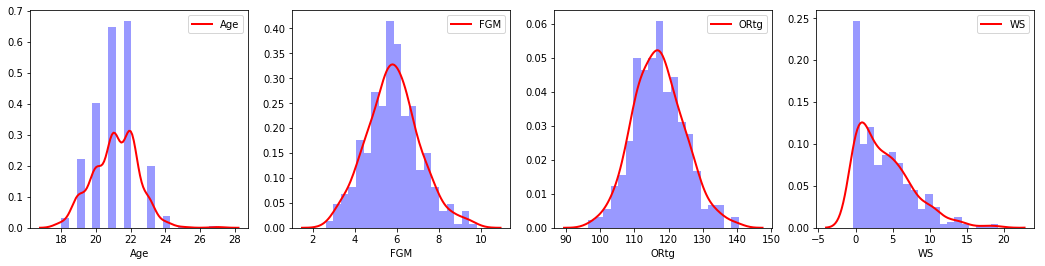

In [30]:
##how to draw density plot：
feature = ["Age", "FGM", "ORtg","WS"]
index = 0
plt.figure(figsize=(18,4))
for fea in feature:
    index +=1
    plt.subplot (1,4,index)
    plt.xlabel(fea)
    sns.distplot(data[fea], kde=True,bins=20, color='b', kde_kws={"color": "r", "lw": 2, "label": fea})


#### 2. Scatter Plot==features against target(WS: win share)

<Figure size 432x288 with 0 Axes>

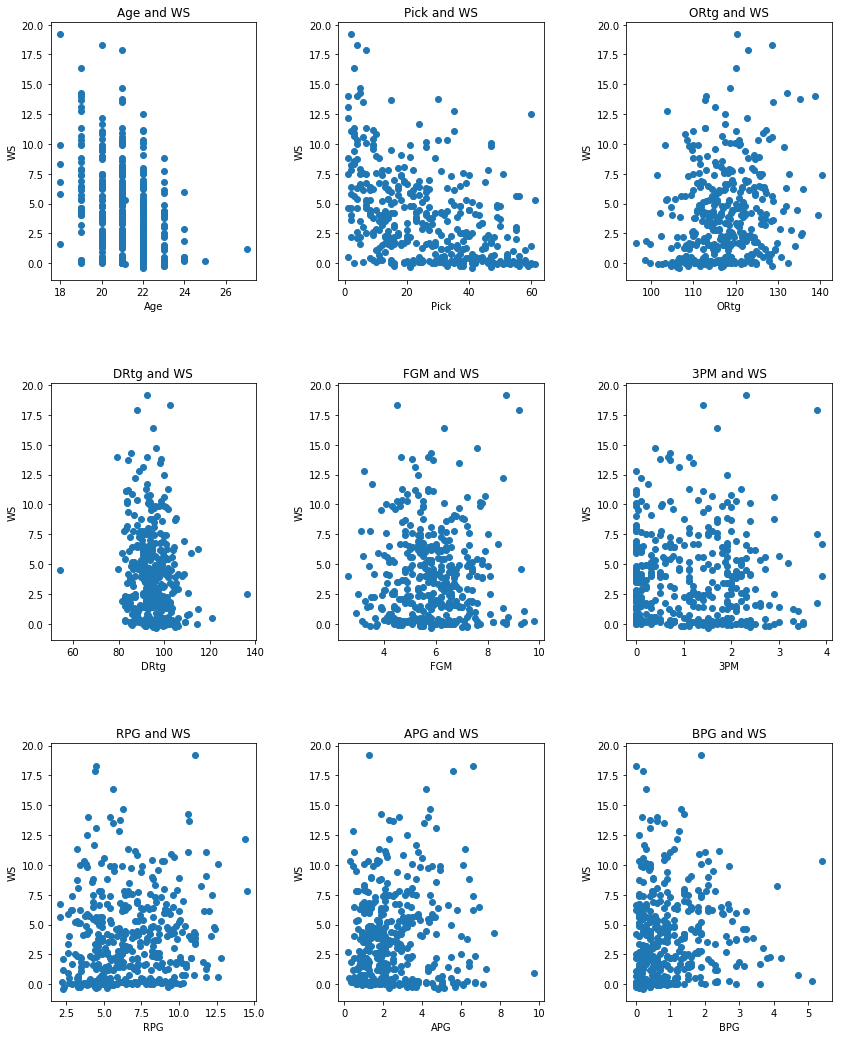

In [31]:
feature = ['Age','Pick','ORtg','DRtg','FGM','3PM','RPG','APG','BPG']
plt.figure()
fig, axes = plt.subplots(3,3, figsize =(14,18))
fig.subplots_adjust(wspace=.4, hspace=.4)
for i in range(9):  
    row, col = i//3, i%3
    axes[row][col].scatter(data[feature[i]], data['WS'])
    axes[row][col].set_title(feature[i]+' and WS')
    axes[row][col].set_xlabel(feature[i])
    axes[row][col].set_ylabel('WS')
plt.show()
   
##results：the last one has some relationship，but not obovious in all,should check further

#### 3. Heatmap--correlation among features

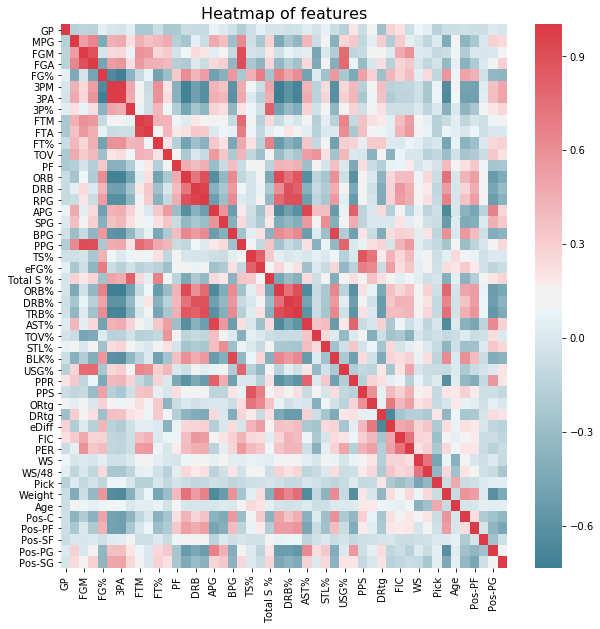

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Heatmap of features",fontsize=16)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(), cmap=cmap)
plt.show()

##results：there're at least 5 blocks, Ex：3pm and 3pa have positive relationship

### <span style="color:red">Model building

#### 1.Training-Testing(validation) split and data normalization

In [33]:
data.head()  #want to drop some features according to the heatmap

,Player,Team_x,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,Pick,Pos,Weight,Age,Pre-Draft Team,Pos-C,Pos-PF,Pos-SF,Pos-PG,Pos-SG
0,Andre Roberson,CU,36,30.2,4.1,8.1,0.510,0.5,1.4,0.380,...,26.0,SG,210.0,21.0,Colorado,0.0,0.0,0.0,0.0,1.0
1,Lavoy Allen,TEM,33,33.9,4.7,9.7,0.480,0.2,0.5,0.294,...,50.0,PF/C,260.0,22.0,Temple,1.0,1.0,0.0,0.0,0.0
2,Vernon Macklin,UF,37,24.5,5.2,8.7,0.593,0.0,0.0,0.000,...,52.0,F,227.0,24.0,Florida,0.0,1.0,1.0,0.0,0.0
3,Ryan Kelly,DUKE,31,25.9,3.5,7.8,0.444,1.3,3.2,0.408,...,48.0,PF,230.0,22.0,Duke,0.0,1.0,0.0,0.0,0.0
4,Michael Kidd-Gilchrist,UK,40,31.1,4.0,8.2,0.491,0.3,1.3,0.255,...,2.0,SF,232.0,18.0,Kentucky,0.0,0.0,1.0,0.0,0.0


In [34]:
features = data.drop(['Player', 'Team_x', 'WS', 'WS/48', 'Pos', 'Pre-Draft Team', 'Pick', 
                     'FIC', 'PF', 'TOV', 'Total S %', 'eDiff'],1)
target = data['WS']

In [35]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.3) 

In [36]:
### feature scaling 
scaler = preprocessing.StandardScaler().fit(features_train)
scaler.transform(features_train)
scaler.transform(features_test)

array([[-0.95001195,  0.07602088, -0.08610383, ..., -0.61237244,
        -0.53692484,  1.47572957],
       [ 0.3641521 ,  0.75106266, -1.16787262, ..., -0.61237244,
        -0.53692484, -0.67763093],
       [-0.95001195,  0.07602088, -0.00883463, ..., -0.61237244,
         1.86245805, -0.67763093],
       ...,
       [-2.59271702,  0.72293592,  1.15020337, ...,  1.63299316,
        -0.53692484, -0.67763093],
       [-0.29292992,  0.9198231 , -1.09060342, ...,  1.63299316,
        -0.53692484, -0.67763093],
       [ 2.00685717, -0.14899305, -1.80148006, ..., -0.61237244,
         1.86245805, -0.67763093]])

In [37]:
features_train.head()

,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,ORtg,DRtg,PER,Weight,Age,Pos-C,Pos-PF,Pos-SF,Pos-PG,Pos-SG
373,39,29.5,3.44,6.38,0.538,0.13,0.97,0.132,2.08,2.87,...,116.9,88.6,19.0,230.0,21.0,0.0,0.0,1.0,0.0,0.0
396,39,31.6,4.10,7.92,0.518,0.54,1.77,0.304,2.56,3.69,...,121.0,93.3,22.4,175.0,19.0,0.0,0.0,0.0,1.0,0.0
9,36,27.5,5.00,8.10,0.611,0.00,0.00,0.000,2.50,4.00,...,111.6,88.1,23.3,265.0,18.0,1.0,1.0,0.0,0.0,0.0
348,30,38.9,7.70,16.90,0.455,1.90,4.80,0.386,7.40,8.20,...,118.0,98.5,26.4,205.0,23.0,0.0,0.0,0.0,1.0,1.0
315,31,34.6,6.80,13.90,0.488,2.40,5.40,0.440,5.30,6.10,...,124.5,101.7,26.3,215.0,22.0,0.0,0.0,1.0,0.0,0.0


#### 2.Linear regression

In [38]:
model_LR = LinearRegression()
model_LR.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
model_LR.coef_ 
##no obvious findings at first glance

array([ 5.83114092e-02,  2.22643513e-02, -7.19051269e-01, -8.22653608e-01,
       -2.23676416e+01,  1.02627645e+00, -4.76991103e-01, -5.38510894e-01,
        3.65631786e-01, -8.10342310e-01, -7.34552400e+00, -3.74105422e-01,
       -3.80623526e-01,  4.55615388e-01, -1.22479313e+00,  2.34724910e+00,
       -9.37863533e-01,  1.21958147e+00, -2.47530104e+01, -2.87962703e+00,
        3.29817103e-02,  7.76063359e-02, -9.78535902e-02,  1.33070739e-01,
        5.65999368e-01, -6.73399047e-01,  3.61458964e-01, -1.92783876e-02,
        7.66399125e-03, -5.26897965e+00,  3.71626155e-01, -7.99593612e-02,
        6.85839231e-02,  8.65255259e-04, -1.24892582e+00,  1.20493052e+00,
       -4.33398294e-01, -5.49763168e-01, -5.41680016e-01, -1.14739291e+00])

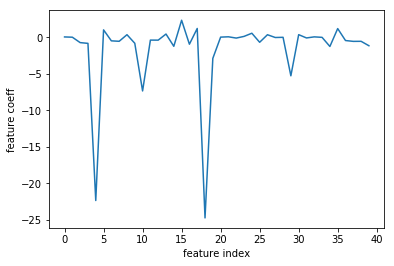

In [40]:
plt.plot(model_LR.coef_)
plt.xlabel('feature index')
plt.ylabel('feature coeff')
plt.show()
##results:many features are close to 0, their contributions are much small

#### 3. ridge regression

In [41]:
# L2 normalization
model_ridge = Ridge(alpha=1.0) #alpha, penalty
model_ridge.fit(features_train, target_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [42]:
model_ridge.coef_

array([ 7.85206835e-02,  1.15738231e-02, -5.94323517e-01,  3.14948795e-01,
       -1.05295698e+00,  1.85293258e+00, -4.22124773e-01, -3.74274172e-01,
        6.63885201e-01, -1.27842449e-01, -5.32708238e-01,  3.00828977e-01,
       -2.41430005e-01,  2.10247685e-01, -1.00822993e+00,  2.01008528e+00,
       -8.21429495e-01,  2.23942041e-02, -1.00845557e+00, -1.17710299e+00,
       -1.02793578e-01, -6.95535394e-02,  2.05255943e-01,  1.04103087e-01,
        3.82158648e-01, -4.96824009e-01,  3.28688212e-01, -3.20482931e-02,
        2.15922903e-01, -3.66233662e+00,  1.85770765e-01, -7.04165161e-02,
        7.33371082e-02,  3.20450806e-03, -1.30339491e+00,  8.37837149e-01,
       -3.77905192e-01, -4.55650998e-01, -4.02555657e-01, -1.00804325e+00])

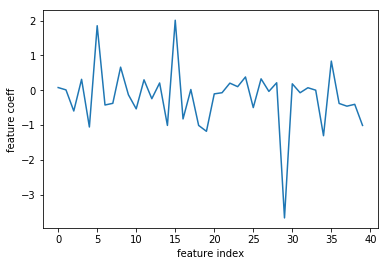

In [43]:
plt.plot(model_ridge.coef_)
plt.xlabel('feature index')
plt.ylabel('feature coeff')
plt.show()

###results，more features count larger on the response
##try Lasso regression, to select the high contributed features

#### 4. Lasso Regression

In [44]:
#L1 normalization
model_lasso = linear_model.Lasso()
model_lasso.fit(features_train, target_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
model_lasso.coef_

array([ 0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.05293423,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.08389328, -0.0649607 ,  0.08718376,  0.00788319, -0.61041911,
        0.        , -0.        , -0.        ,  0.        , -0.        ])

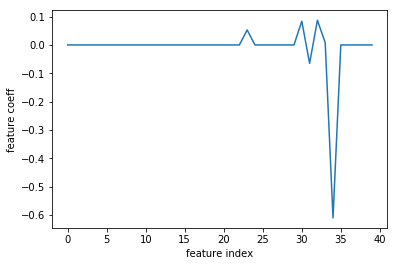

In [46]:
plt.plot(model_lasso.coef_)
plt.xlabel('feature index')
plt.ylabel('feature coeff')
plt.show()

In [47]:
# to find which feature are important according to the model
imp_features = features_train.columns.get_values()

In [48]:
imp_features

array(['GP', 'MPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG', 'PPG',
       'TS%', 'eFG%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'TOV%', 'STL%',
       'BLK%', 'USG%', 'PPR', 'PPS', 'ORtg', 'DRtg', 'PER', 'Weight',
       'Age', 'Pos-C', 'Pos-PF', 'Pos-SF', 'Pos-PG', 'Pos-SG'],
      dtype=object)

In [49]:
imp_features[~(model_lasso.coef_==0)]

array(['AST%', 'ORtg', 'DRtg', 'PER', 'Weight', 'Age'], dtype=object)

### Cross validation

In [51]:
##test the three training models
scores_LR1 = cross_validate(model_LR, features_test, target_test, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
scores_LR2 = cross_validate(model_LR, features_test, target_test, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
print("Cross-Validation score for Linear Regression: ", np.mean(-1*scores_LR1['test_score']), np.sqrt(np.mean(-1*scores_LR2['test_score'])))

scores_ridge1 = cross_validate(model_ridge, features_test, target_test, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
scores_ridge2 = cross_validate(model_ridge, features_test, target_test, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
print("Cross-Validation score for Ridge Regression: ", np.mean(-1*scores_ridge1['test_score']), np.sqrt(np.mean(-1*scores_ridge2['test_score'])))

scores_lasso1 = cross_validate(model_lasso, features_test, target_test, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
scores_lasso2 = cross_validate(model_lasso, features_test, target_test, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
print("Cross-Validation score for Lasso Regression: ", np.mean(-1*scores_lasso1['test_score']), np.sqrt(np.mean(-1*scores_lasso2['test_score'])))

Cross-Validation score for Linear Regression:  3.994788904769522 6.793825432789359
Cross-Validation score for Ridge Regression:  3.0731251431344573 3.878637744763477
Cross-Validation score for Lasso Regression:  2.8197223265826628 3.5243818601102554


#### Make predictions

In [52]:
#using the prospects_df dataset as the test data, to make the prediction
prospects_df = pd.read_csv('2018_prospects.csv')

In [53]:
prospects_df.head()

,Player,Pos,Pre-Draft Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,PPR,PPS,ORtg,DRtg,PER,Pick,Weight,Age,Heightw/shoesinches,Wingspan_inches
0,Deandre Ayton,C,Arizona,35,33.5,7.9,12.9,0.612,0.3,1.0,...,-2.7,1.6,130.3,97.5,30.6,1,250,19.6,85,89.0
1,Marvin Bagley III,PF/C,Duke,33,33.9,8.2,13.3,0.614,0.7,1.8,...,-3.7,1.6,128.1,97.5,28.3,2,225,18.9,83,84.5
2,Luka Doncic,PG,Real Madrid,49,24.7,4.7,10.4,0.456,1.5,4.9,...,4.2,1.5,124.2,106.2,25.4,3,220,19.0,80,NaN
3,Jaren Jackson Jr.,PF/C,Michigan State,35,21.8,3.4,6.6,0.513,1.1,2.7,...,-4.8,1.6,120.7,85.8,25.1,4,225,18.4,83,88.0
4,Mohamed Bamba,C,Texas,30,30.2,4.9,9.0,0.541,0.5,1.7,...,-4.2,1.4,118.4,88.4,26.4,5,216,19.8,85,93.0


In [55]:
prospects_df.isnull().sum()

Player                  0
Pos                     0
Pre-Draft Team          0
GP                      0
MPG                     0
FGM                     0
FGA                     0
FG%                     0
3PM                     0
3PA                     0
3P%                     0
FTM                     0
FTA                     0
FT%                     0
ORB                     0
DRB                     0
RPG                     0
APG                     0
SPG                     0
BPG                     0
PPG                     0
TS%                     0
eFG%                    0
ORB%                    0
DRB%                    0
TRB%                    0
AST%                    0
TOV%                    0
STL%                    0
BLK%                    0
USG%                    0
PPR                     0
PPS                     0
ORtg                    0
DRtg                    0
PER                     2
Pick                    0
Weight                  0
Age         

In [56]:
prospects_df['Wingspan_inches'] = prospects_df['Wingspan_inches'].fillna(prospects_df['Wingspan_inches'].mean())
#fill the null value of Wingspan_inches using its mean
prospects_df['PER'] = prospects_df['PER'].fillna(prospects_df['PER'].mean())

In [57]:
prospects_df.reset_index(drop=True)
prospects_df['Pos-C']=0.0
prospects_df['Pos-PF']=0.0
prospects_df['Pos-SF']=0.0
prospects_df['Pos-PG']=0.0
prospects_df['Pos-SG']=0.0
for i in range(len(prospects_df)):
    p = prospects_df.Pos.str.split("/")[i]
    prospects_df.loc[i,'Pos-C'] = any(c in p for c in ('C','FC'))*1.0
    prospects_df.loc[i,'Pos-PF'] = any(c in p for c in ('GF','F-G','G-F','F','PF'))*1.0
    prospects_df.loc[i,'Pos-SF'] = any(c in p for c in ('GF','F-G','G-F','F','SF'))*1.0
    prospects_df.loc[i,'Pos-PG'] = any(c in p for c in ('GF','F-G','G-F','G','PG'))*1.0
    prospects_df.loc[i,'Pos-SG'] = any(c in p for c in ('GF','F-G','G-F','G','SG'))*1.0

In [58]:
pro_features = prospects_df.drop(['Player', 'Pre-Draft Team', 'Pos', 'Pick', 
                                  'Heightw/shoesinches', 'Wingspan_inches'], 1)#create the same feature

In [59]:
pro_features.head()

,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,ORtg,DRtg,PER,Weight,Age,Pos-C,Pos-PF,Pos-SF,Pos-PG,Pos-SG
0,35,33.5,7.9,12.9,0.612,0.3,1.0,0.343,4.0,5.5,...,130.3,97.5,30.6,250,19.6,1.0,0.0,0.0,0.0,0.0
1,33,33.9,8.2,13.3,0.614,0.7,1.8,0.397,4.0,6.3,...,128.1,97.5,28.3,225,18.9,1.0,1.0,0.0,0.0,0.0
2,49,24.7,4.7,10.4,0.456,1.5,4.9,0.304,4.1,5.1,...,124.2,106.2,25.4,220,19.0,0.0,0.0,0.0,1.0,0.0
3,35,21.8,3.4,6.6,0.513,1.1,2.7,0.396,3.0,3.8,...,120.7,85.8,25.1,225,18.4,1.0,1.0,0.0,0.0,0.0
4,30,30.2,4.9,9.0,0.541,0.5,1.7,0.275,2.7,4.0,...,118.4,88.4,26.4,216,19.8,1.0,0.0,0.0,0.0,0.0


In [60]:
pro_features.isnull().sum()

GP        0
MPG       0
FGM       0
FGA       0
FG%       0
3PM       0
3PA       0
3P%       0
FTM       0
FTA       0
FT%       0
ORB       0
DRB       0
RPG       0
APG       0
SPG       0
BPG       0
PPG       0
TS%       0
eFG%      0
ORB%      0
DRB%      0
TRB%      0
AST%      0
TOV%      0
STL%      0
BLK%      0
USG%      0
PPR       0
PPS       0
ORtg      0
DRtg      0
PER       0
Weight    0
Age       0
Pos-C     0
Pos-PF    0
Pos-SF    0
Pos-PG    0
Pos-SG    0
dtype: int64

In [61]:
np.isfinite(pro_features).all()

GP        True
MPG       True
FGM       True
FGA       True
FG%       True
3PM       True
3PA       True
3P%       True
FTM       True
FTA       True
FT%       True
ORB       True
DRB       True
RPG       True
APG       True
SPG       True
BPG       True
PPG       True
TS%       True
eFG%      True
ORB%      True
DRB%      True
TRB%      True
AST%      True
TOV%      True
STL%      True
BLK%      True
USG%      True
PPR       True
PPS       True
ORtg      True
DRtg      True
PER       True
Weight    True
Age       True
Pos-C     True
Pos-PF    True
Pos-SF    True
Pos-PG    True
Pos-SG    True
dtype: bool

In [62]:
scaler.transform(pro_features)

array([[ 0.3641521 ,  0.49792199,  1.61381857, ..., -0.61237244,
        -0.53692484, -0.67763093],
       [-0.29292992,  0.61042895,  1.84562617, ..., -0.61237244,
        -0.53692484, -0.67763093],
       [ 4.96372629, -1.97723121, -0.85879582, ..., -0.61237244,
         1.86245805, -0.67763093],
       ...,
       [ 0.69269312, -1.16155572, -0.54971902, ..., -0.61237244,
        -0.53692484, -0.67763093],
       [ 1.34977514,  0.38541503, -0.78152662, ..., -0.61237244,
        -0.53692484,  1.47572957],
       [-0.95001195, -1.8365975 , -1.94056462, ..., -0.61237244,
         1.86245805, -0.67763093]])

In [63]:
#using lasso model to do prediction
results = model_lasso.predict(pro_features)

In [64]:
prospects_df['WS'] = results  #insert the column WS with the predicted results 
final = prospects_df[['Player', 'Pick', 'WS']]#here the Pick is the original, WS is predicted
final

,Player,Pick,WS
0,Deandre Ayton,1,6.335229
1,Marvin Bagley III,2,6.090367
2,Luka Doncic,3,6.072808
3,Jaren Jackson Jr.,4,6.298166
4,Mohamed Bamba,5,4.822392
5,Michael Porter Jr.,6,2.573116
6,Mikal Bridges,7,4.674557
7,Wendell Carter Jr.,8,6.516507
8,Collin Sexton,9,4.422296
9,Miles Bridges,10,4.717057


In [65]:
 #WS is the predicted order the higher WS (score) the better,Wendell Carter Jr. is predicted the champion, Deandre Ayton is predicted the sencond
final.sort_values(['WS'],ascending=[False]).iloc[0:60,]

,Player,Pick,WS
7,Wendell Carter Jr.,8,6.516507
0,Deandre Ayton,1,6.335229
3,Jaren Jackson Jr.,4,6.298166
1,Marvin Bagley III,2,6.090367
2,Luka Doncic,3,6.072808
17,Zhaire Smith,18,5.663598
12,Trae Young,13,5.612093
58,Jontay Porter,59,5.485135
84,Gary Clark,61,5.382414
85,Aric Holman,61,4.854049


In [70]:
#Compare with the real results
ground = pd.read_csv('2018_NBA_Draft.csv')
ground = ground[['Player','Pick']]
perf = pd.merge(ground, final, how='left', on='Player')
#ground is the real order, final is the predicted order by WS including the prior pick order
final_perf = perf.sort_values(['WS'], ascending=[False])#sort the perf by WS

In [71]:
final_perf
##pick-x is the real results in 2018，pick_y is predicted by the NBA office，ws is predicted by mine model##
### In mine prediction, there're 3 bad results in the predicted top 10 

,Player,Pick_x,Pick_y,WS
6,Wendell Carter Jr.,7,8.0,6.516507
0,Deandre Ayton,1,1.0,6.335229
3,Jaren Jackson Jr.,4,4.0,6.298166
1,Marvin Bagley III,2,2.0,6.090367
2,Luka Doncic,3,3.0,6.072808
15,Zhaire Smith,16,18.0,5.663598
4,Trae Young,5,13.0,5.612093
5,Mohamed Bamba,6,5.0,4.822392
32,Jalen Brunson,33,33.0,4.783016
11,Miles Bridges,12,10.0,4.717057


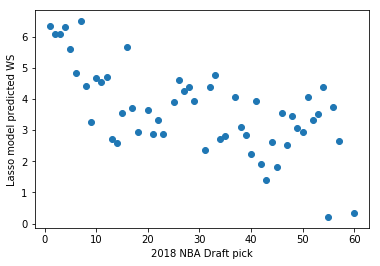

In [72]:
#visualize the results
plt.scatter(final_perf.Pick_x, final_perf.WS)
plt.xlabel('2018 NBA Draft pick')
plt.ylabel('Lasso model predicted WS')
plt.show()
##random distributed, not bad

##### Deandre Ayton  is the champion in 2018, my prediction is the runner-up，the prior pick is the champion.



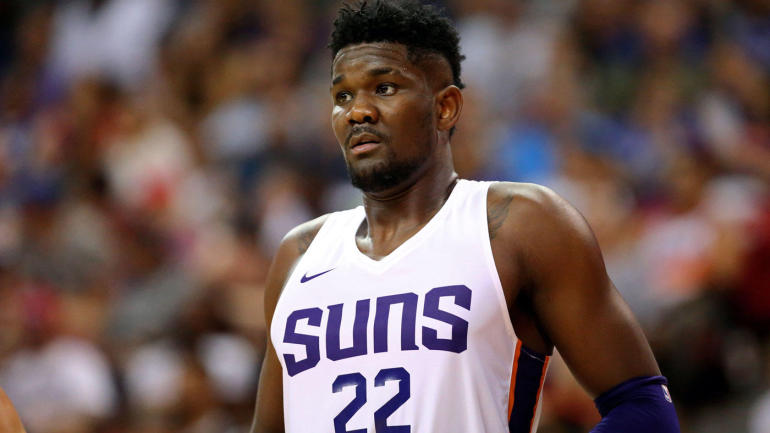

In [75]:
from IPython.display import Image   
Image(filename='2018R1_deandre-ayton.jpg')